In [1]:
import os
import sys

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [3]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from tqdm.notebook import tqdm
%matplotlib inline

In [4]:
import barcodes

In [5]:
import pickle
from cka import cka
from msid import msid_score
from svcca import svcca

def msid_score_n(a, b, n):
    total = 0.0
    for _ in range(n):
        total += msid_score(a, b)
    return total / n

### Exp many clusters

In [6]:
np.random.seed(7)

all_clusters = []

for i in range(60):
    all_clusters.append(np.random.multivariate_normal(np.zeros(2), np.eye(2), 5))
    
A_base = np.concatenate(all_clusters)

In [7]:
def split2clusters(k):
    
    if k == 1:
        return A_base
    
    arr = []
    
    for i in range(60):
        idx = i % k
    
        theta = 2 * np.pi * idx / k
        d = np.array([np.cos(theta), np.sin(theta)]) * 10
        
        arr.append(all_clusters[i] + d)
        
    A_mod = np.concatenate(arr)
    
    return A_mod

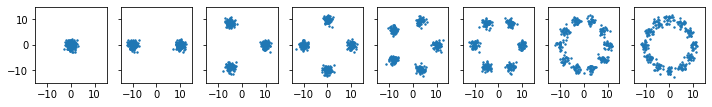

In [8]:
ALL = [2, 3, 4, 5, 6, 10, 12]

fig, ax = plt.subplots(1, len(ALL) + 1)
fig.set_size_inches(12, 1.4)

for idx, k in enumerate([0] + ALL):
    
    if idx == 0:
        A = A_base
    else:
        A = split2clusters(k)

    ax[idx].scatter(x = A[:,0], y = A[:,1], s = 2)
    ax[idx].set_xlim(-15, 15)
    ax[idx].set_ylim(-15, 15)
    
for ax in fig.get_axes():
    ax.label_outer()

In [9]:
%%time

for i, k in enumerate(ALL):
    A_mod = split2clusters(k)
    barc = barcodes.calc_embed_dist(A_base, A_mod, norm = 'quantile')
    barc = barcodes.calc_embed_dist(A_mod, A_base, norm = 'quantile')

CPU times: user 1min 55s, sys: 11.8 s, total: 2min 7s
Wall time: 19.7 s


In [11]:
%%time

for i, k in enumerate(ALL):
    A_mod = split2clusters(k)
    cka(A_base, A_mod)

CPU times: user 2.33 s, sys: 172 ms, total: 2.5 s
Wall time: 65.8 ms


In [12]:
%%time

for i, k in enumerate(ALL):
    A_mod = split2clusters(k)
    msid_score_n(A_base, A_mod, 100)

CPU times: user 1min 23s, sys: 97.9 ms, total: 1min 23s
Wall time: 1min 23s


In [13]:
%%time

for i, k in enumerate(ALL):
    A_mod = split2clusters(k)   
    svcca(A_base.T, A_mod.T)

CPU times: user 993 ms, sys: 121 ms, total: 1.11 s
Wall time: 31.9 ms
